# Spotify Data Science Challenge


## Question 1:

*On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.*


##### 1. What could go wrong with our calculation. Think about a better way to evaluate the data 

First, we import a number of libraries to be used for easier data analysis and visualization

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

a) For a new DataFrames, we will first calculate some basic summary statistics to see some properties of the DataFrames

In [6]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

First few rows of the given dataset:

In [7]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Next, we will see if there is any missing values and remove it if any, for precision in our analysis.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


There are no missing-values so we will proceed on finding some basic statistical summary.
Since we are interested in Average Order Value of the dataset, we will focus on "order_amount" columns.

In [8]:
df["order_amount"].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

We can see that the mean of "order_amount" columns are closely equivalent to the initial naive approximation (3145.13 in approximation). Therefore, I assume that the naive analysis of Shopify concludes that the mean of the dataset is the AOV by applying the formulas of AOV (revenue_generated / number of orders) onto the metrics.

However, we have to look at this point: Why businesses want to determine their AOV? 
- To study about customer behaviours, how much a customer will likely to spend for a specific items. In this case, how much a customer is willing to spend for a shoes. -> To expect a revenue that they can generate over a longer period of time and the price range for their products based on these customers behaviours learnt from data.
  
#### 1. First assumptions  
In a dataset, there may be some outliers (people spend one-time extravagant amount on shoes) and it does not reflect for the companies long term plan. This will make the mean very high (3145.128 compared to the order_amount of the first few rows). 

To verify this assumption, we will compute the plot of order_amount distribution.

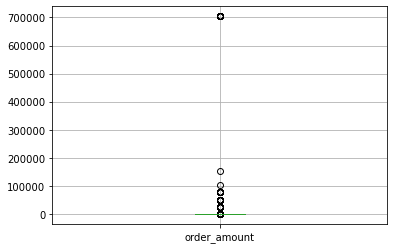

In [16]:
boxplot = df.boxplot(column=['order_amount'],grid=True)


As expected, the box is squeezed to the bottom since we have a lot of outliers. Let have a look at the outliers by computing the few first highest value of the dataset. 


In [28]:
df.sort_values('order_amount',ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
...,...,...,...,...,...,...,...
3871,3872,92,818,90,1,debit,2017-03-18 9:10:08
2503,2504,92,935,90,1,credit_card,2017-03-28 2:30:26
4414,4415,92,927,90,1,credit_card,2017-03-17 9:57:01
3363,3364,92,730,90,1,credit_card,2017-03-11 23:20:31


We can tell by the first few values that the same user_ID makes the same amount of items that result in outliers. With the order_amount up to 704000, it is possible that they buying in large amounts to resell because the product is popular. 

Let us try to make a scatter plot based on user_ID and order_amount to better visualize the outliers and the range in which the dataset concentrates distributing on.

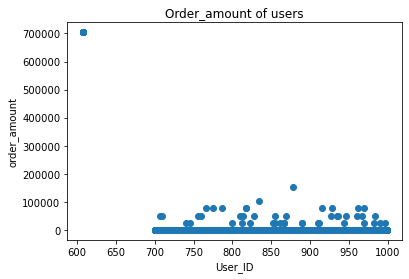

In [33]:
plt.scatter(df['user_id'],df['order_amount'])
plt.title('Order_amount of users')
plt.xlabel('User_ID')
plt.ylabel('order_amount')
plt.show()

Now, we will remove outliers by simply using Seaborn (Python libraries). We will use box and whisker plot to show median values (line in the middle of the box), and other helpful insights for the dataset. 

<AxesSubplot:xlabel='order_amount'>

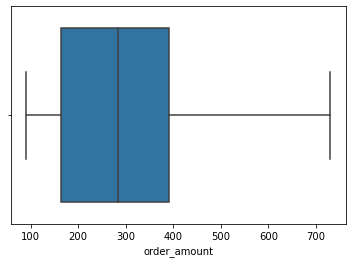

In [36]:
sb.boxplot(x=df['order_amount'],showfliers= False)

In [37]:
df.median()

order_id        2500.5
shop_id           50.0
user_id          849.0
order_amount     284.0
total_items        2.0
dtype: float64

#### 2. What metric would you report for this dataset? 
We can see the huge difference between the mean and the median of the dataset. However, having explained the insights that AOV will give us: to better understand the majority of our customer behaviours. Therefore, we will use median as a metric in this AOV calculations to avoid those data of customers that are buying a large quantities to resell (which occurs frequently in the sneakers industry). 

#### 3. What is its value? 
284.0